In [5]:
!pip install --upgrade --quiet transformers datasets evaluate soundfile librosa  


In [6]:
%reset -f

Nearly every NLP task begins with a tokenizer. A tokenizer converts your input into a format that can be processed by the model.

Load a tokenizer with AutoTokenizer.from_pretrained():

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

Then tokenize your input as shown below:



In [8]:
sequence = "In a hole in the ground there lived a hobbit."
print(tokenizer(sequence))

{'input_ids': [101, 1999, 1037, 4920, 1999, 1996, 2598, 2045, 2973, 1037, 7570, 10322, 4183, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


For vision tasks, an image processor processes the image into the correct input format.



In [9]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


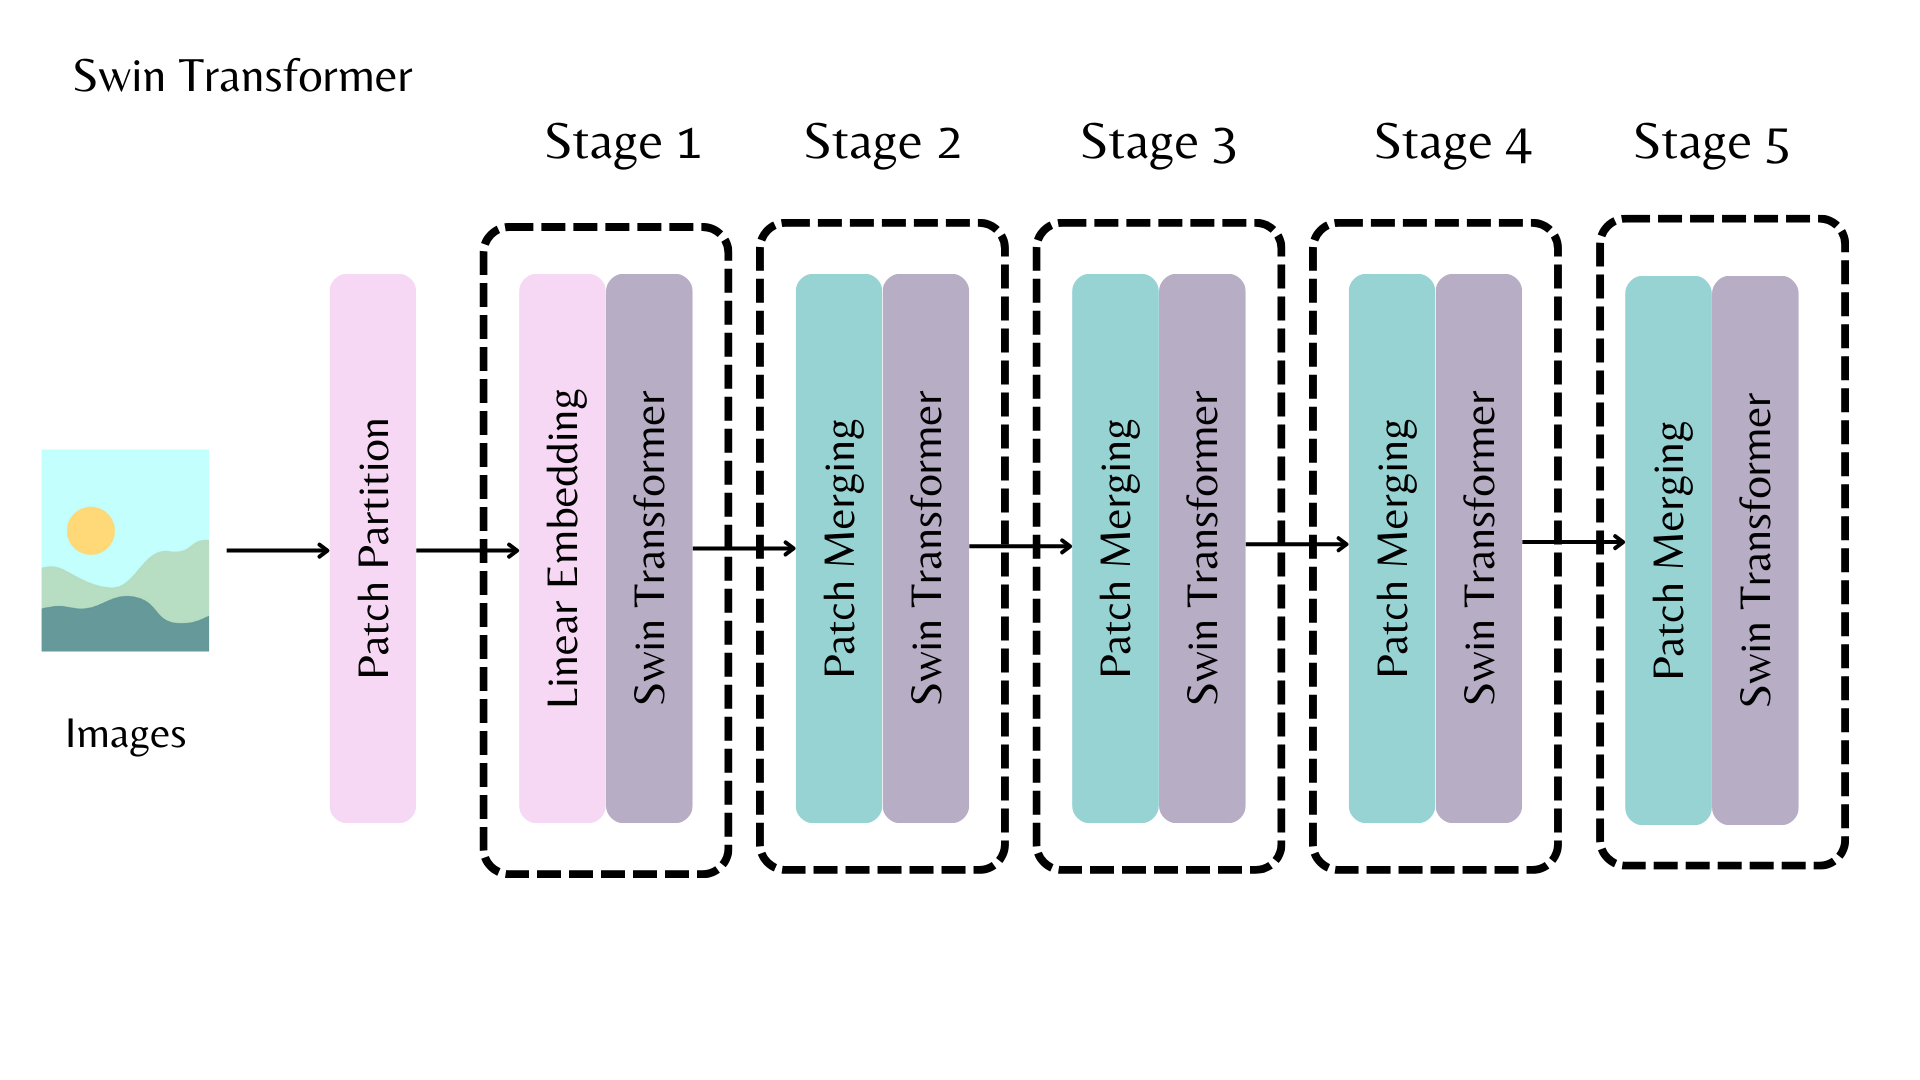
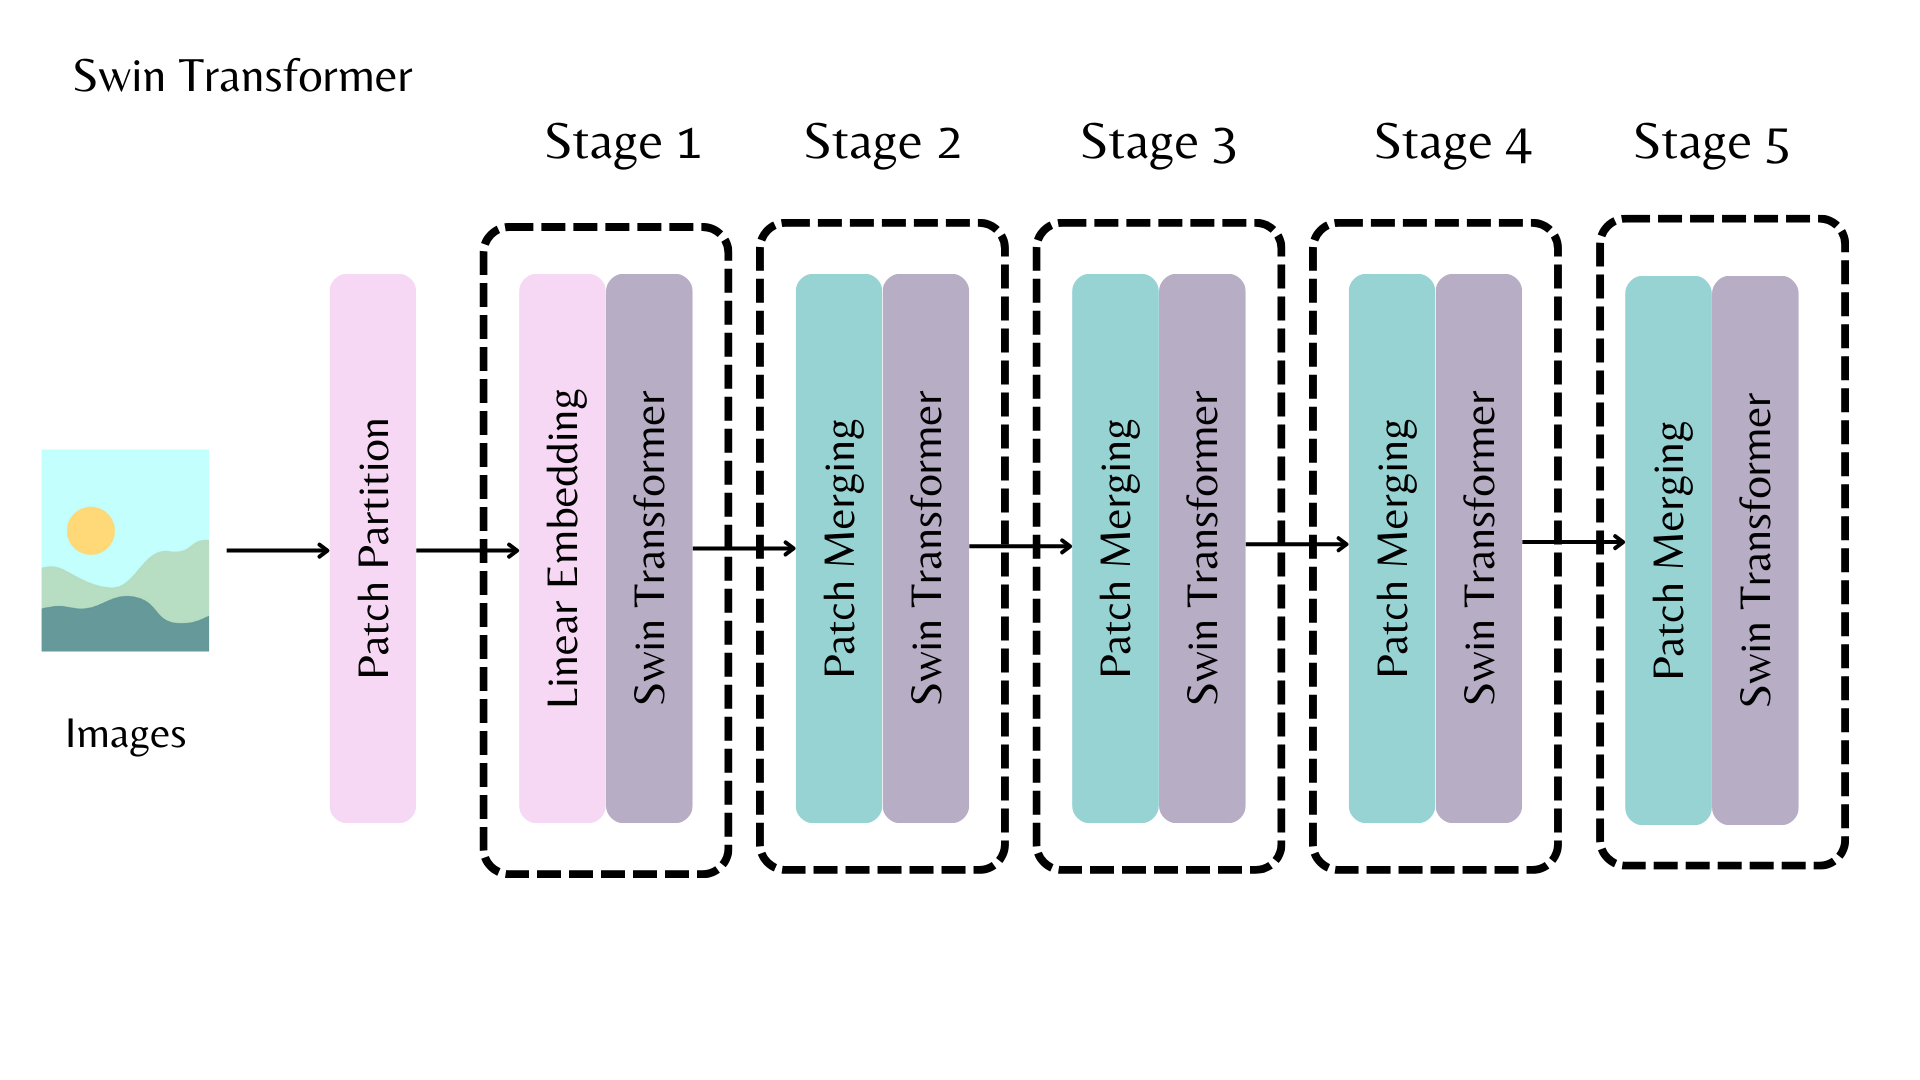

The AutoBackbone lets you use pretrained models as backbones to get feature maps from different stages of the backbone. You should specify one of the following parameters in from_pretrained():

out_indices is the index of the layer you’d like to get the feature map from
out_features is the name of the layer you’d like to get the feature map from
These parameters can be used interchangeably, but if you use both, make sure they’re aligned with each other! If you don’t pass any of these parameters, the backbone returns the feature map from the last layer.

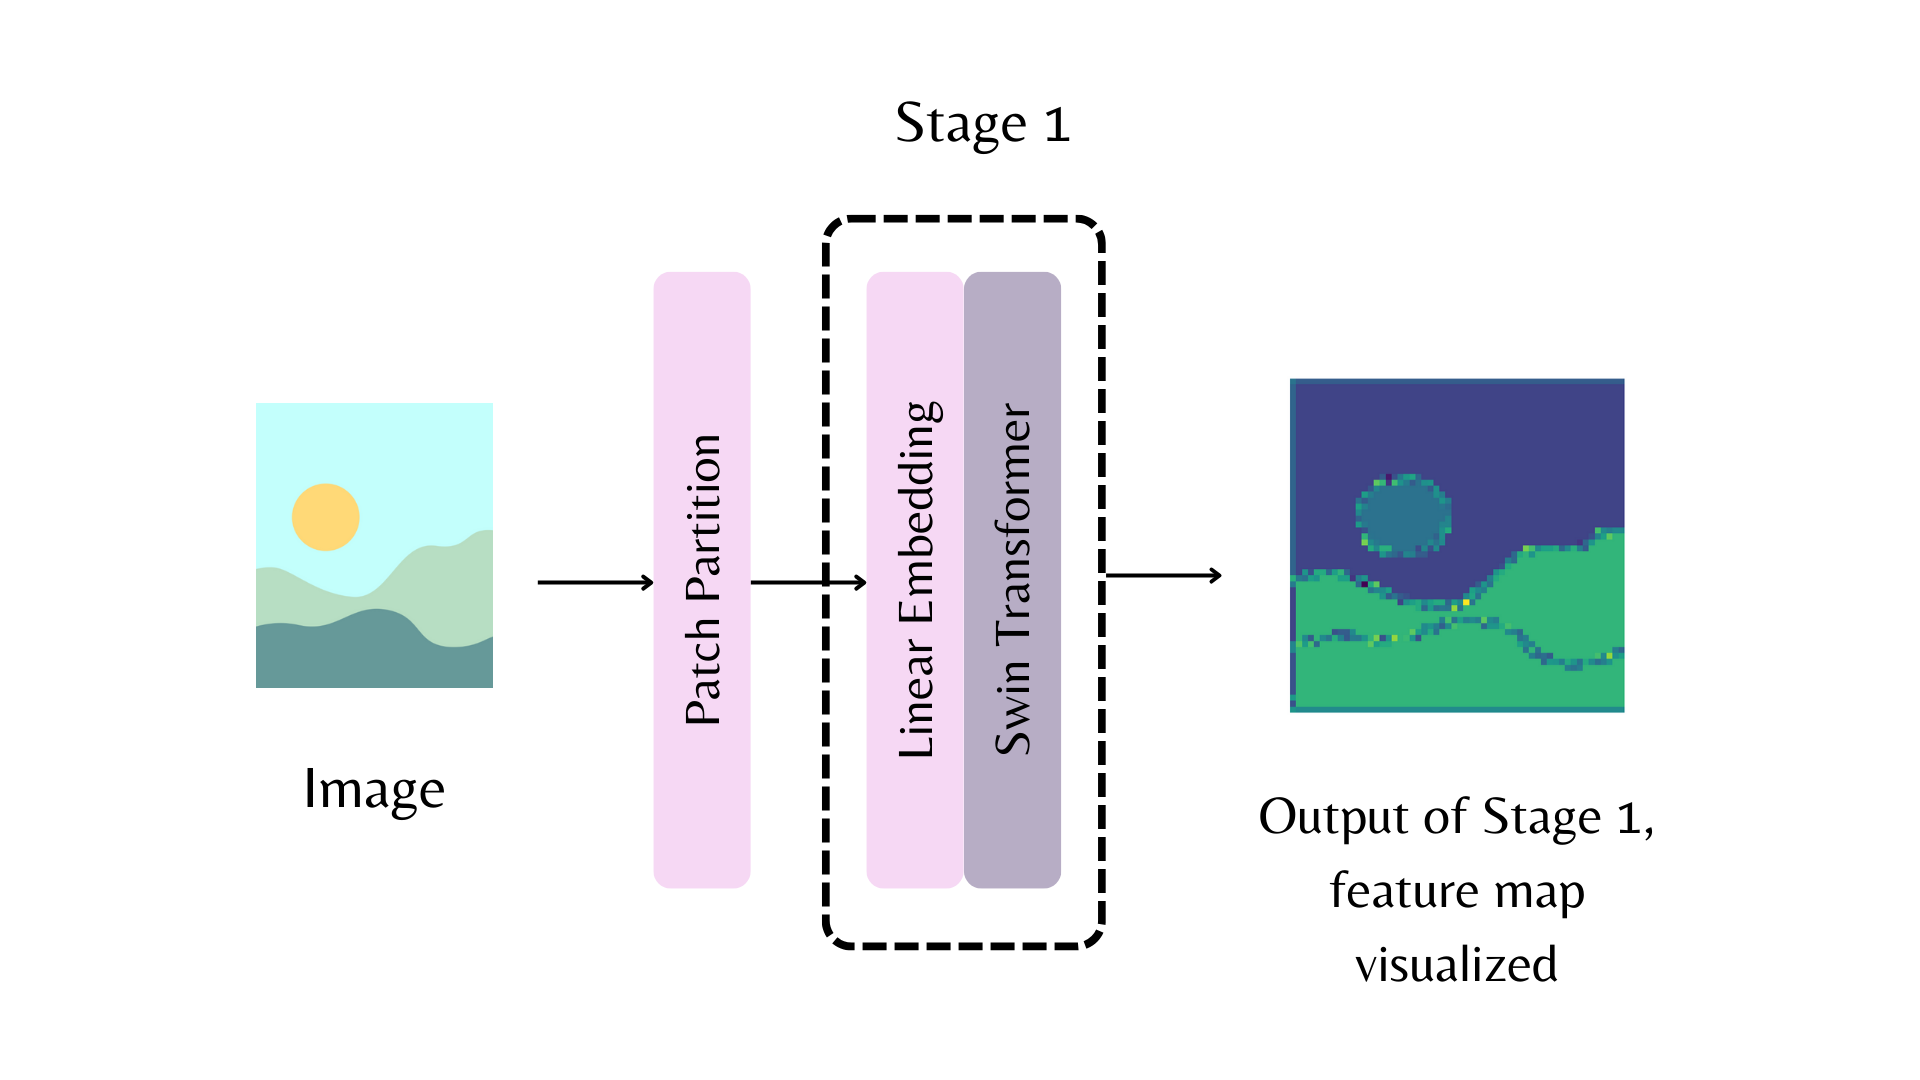
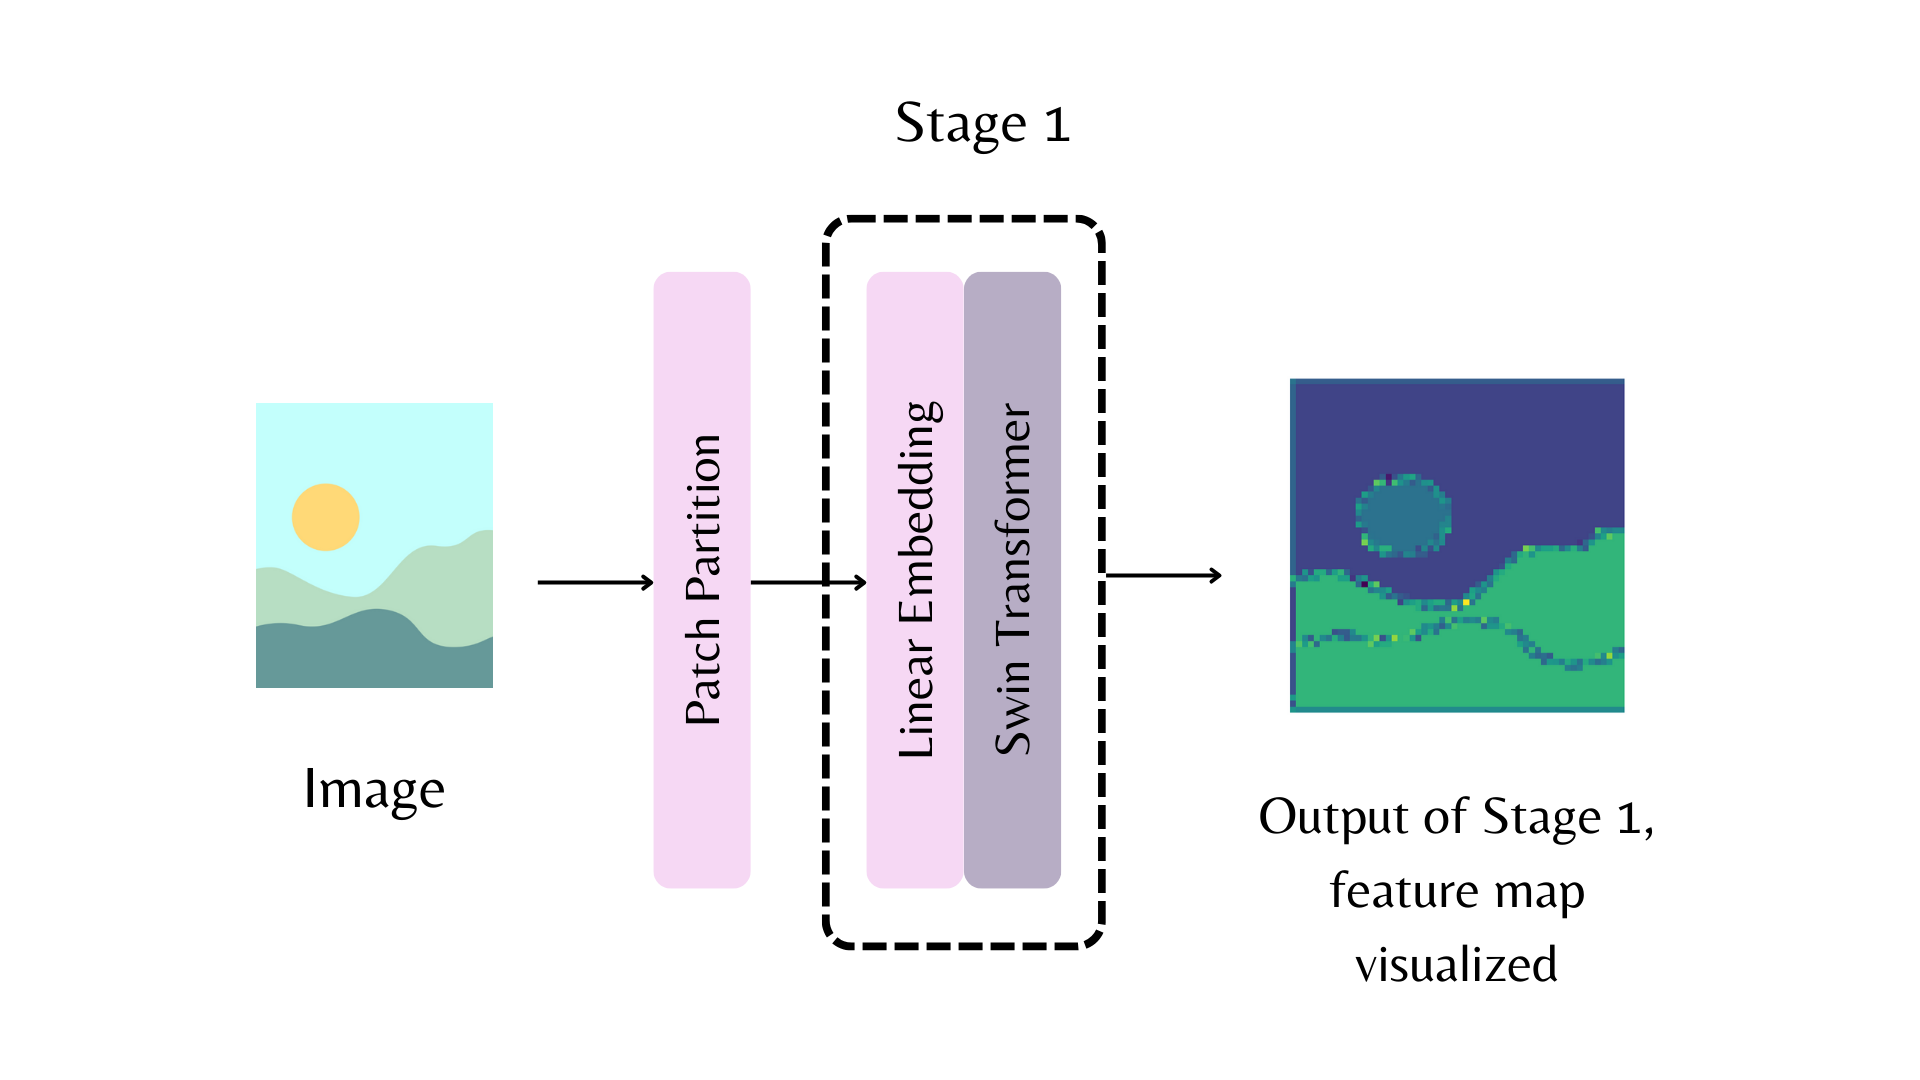

For example, in the above diagram, to return the feature map from the first stage of the Swin backbone, you can set out_indices=(1,):

In [10]:
from transformers import AutoImageProcessor, AutoBackbone
import torch
from PIL import Image
import requests
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = AutoBackbone.from_pretrained("microsoft/swin-tiny-patch4-window7-224", out_indices=(1,))

inputs = processor(image, return_tensors="pt")
outputs = model(**inputs)
feature_maps = outputs.feature_maps

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinBackbone were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized: ['swin.hidden_states_norms.stage1.bias', 'swin.hidden_states_norms.stage1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
#Now you can access the feature_maps object from the first stage of the backbone:

list(feature_maps[0].shape)

[1, 96, 56, 56]

For audio tasks, a feature extractor processes the audio signal into the correct input format.

Load a feature extractor with AutoFeatureExtractor.from_pretrained():

In [12]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
)

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

Multimodal tasks require a processor that combines two types of preprocessing tools. For example, the LayoutLMV2 model requires an image processor to handle images and a tokenizer to handle text; a processor combines both of them.

Load a processor with AutoProcessor.from_pretrained():

In [13]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv2-base-uncased")

preprocessor_config.json:   0%|          | 0.00/135 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [14]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", torch_dtype="auto")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("distilbert/distilbert-base-uncased", torch_dtype="auto")

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
